# Checking consistency between figures

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
from src.models.model_setup import ModelSetup
from src.xr_utils import open_dataset, open_dataarray
from src.configs.load_config import load_config

In [5]:
import os

In [6]:
from src.plot_utils import add_units

In [8]:
ls ../../logs

days_0.55/  days_0.75/  days_1.05/  days_1.8/  days_2.5/
days_0.65/  days_0.95/  days_1.25/  days_2/    it_1a/


In [9]:
# run_dir = "/home/users/sithom/seager19/logs/fix_ts_trend/wandb/run-20210616_083832-3athbzpm/files"
uncoupled_run_dir = "/home/users/sithom/seager19/logs/it_1a"

In [16]:
cfg = load_config(test=False)
uncoup_setup = ModelSetup(run_dir, cfg,  make_move=False)

In [84]:
uncoup_setup.direc

'/home/users/sithom/seager19/logs/it_1a'

In [17]:
uncoup_atm = open_dataset(uncoup_setup.tcam_output())

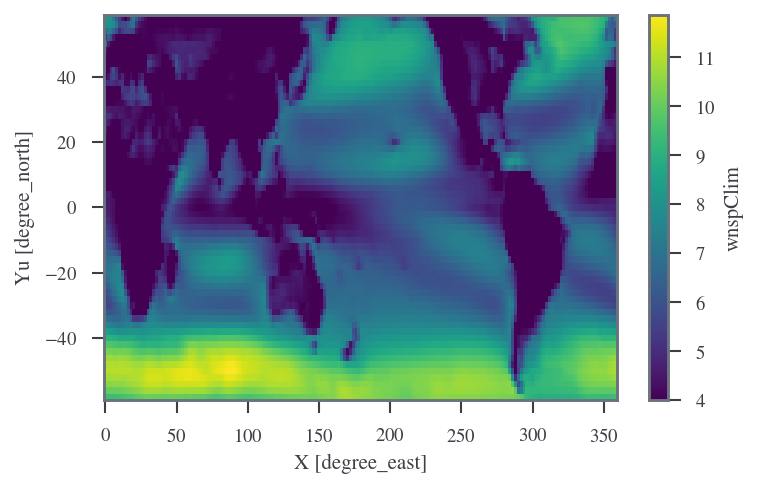

In [21]:
uncoup_atm.wnspClim.plot()

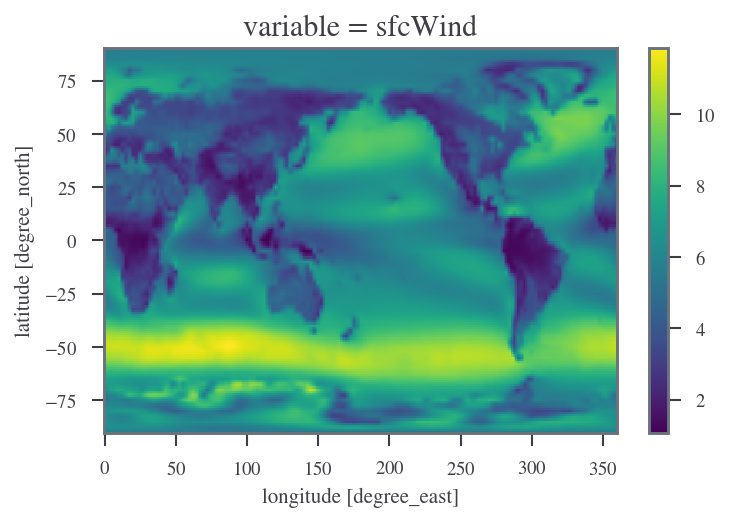

In [22]:
open_dataarray(setup.ecmwf_sfcwind()).plot()

In [24]:
import xarray as xr
from src.constants import FIGURE_DATA_PATH

In [33]:
fig_data = xr.open_dataset(FIGURE_DATA_PATH)

In [25]:
from typing import List
def return_var_list(num: int) -> List[str]:
    var_list = []
    for var in xr.open_dataset(FIGURE_DATA_PATH):
        if "Fig_" + str(num) in var:
            var_list.append(var)
    return var_list

In [27]:
return_var_list(2)

['ForcedAtmosphereModel.Fig_2c.nc.epsu',
 'ForcedAtmosphereModel.Fig_2c.nc.epsv',
 'ForcedAtmosphereModel.Fig_2c.nc.Hq',
 'ForcedAtmosphereModel.Fig_2c.nc.K',
 'ForcedAtmosphereModel.Fig_2c.nc.mask',
 'ForcedAtmosphereModel.Fig_2c.nc.phitrend',
 'ForcedAtmosphereModel.Fig_2c.nc.prClim',
 'ForcedAtmosphereModel.Fig_2c.nc.PRtrend',
 'ForcedAtmosphereModel.Fig_2c.nc.Qthtrend',
 'ForcedAtmosphereModel.Fig_2c.nc.spClim',
 'ForcedAtmosphereModel.Fig_2c.nc.tsClim',
 'ForcedAtmosphereModel.Fig_2c.nc.tstrend',
 'ForcedAtmosphereModel.Fig_2c.nc.utrend',
 'ForcedAtmosphereModel.Fig_2c.nc.vtrend',
 'ForcedAtmosphereModel.Fig_2c.nc.wnspClim',
 'ForcedAtmosphereModel.Fig_2d.nc.epsu',
 'ForcedAtmosphereModel.Fig_2d.nc.epsv',
 'ForcedAtmosphereModel.Fig_2d.nc.Hq',
 'ForcedAtmosphereModel.Fig_2d.nc.K',
 'ForcedAtmosphereModel.Fig_2d.nc.mask',
 'ForcedAtmosphereModel.Fig_2d.nc.phitrend',
 'ForcedAtmosphereModel.Fig_2d.nc.prClim',
 'ForcedAtmosphereModel.Fig_2d.nc.PRtrend',
 'ForcedAtmosphereModel.Fig_2d

In [30]:
var_list = []
for var in uncoup_atm:
    var_list.append(var)
print(var_list)

['K', 'epsu', 'epsv', 'hq', 'wnspClim', 'tsClim', 'prClim', 'spClim', 'tsTrend', 'prTrend', 'mask', 'utrend', 'vtrend', 'phitrend', 'tstrend', 'PRtrend', 'Qthtrend', 'uend', 'vend', 'wend', 'phiend', 'tsend', 'PRend', 'Qthend', 'Eend', 'MCend', 'qaend', 'ubeg', 'vbeg', 'wbeg', 'phibeg', 'tsbeg', 'PRbeg', 'Qthbeg', 'Ebeg', 'MCbeg', 'qabeg']


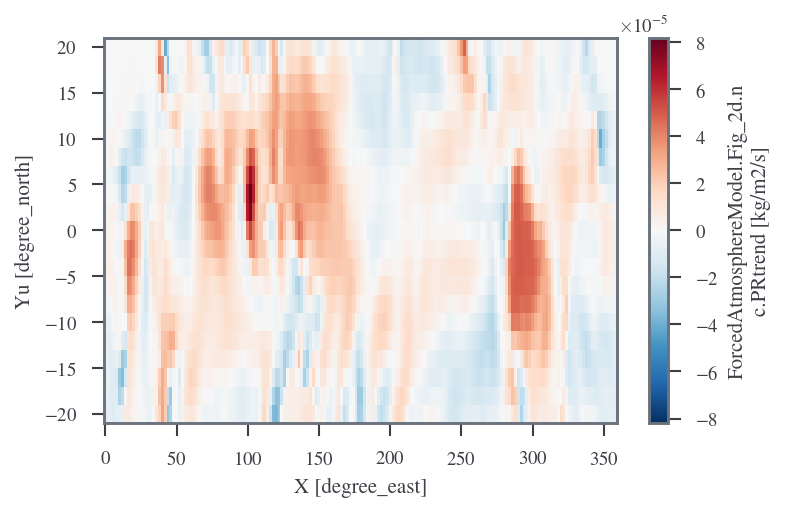

In [41]:
# fig_data["ForcedAtmosphereModel.Fig_2c.nc.epsu"]
# fig_data["ForcedAtmosphereModel.Fig_2c.nc.epsv"]
fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"].sel(Yu=slice(-20, 20)).plot()

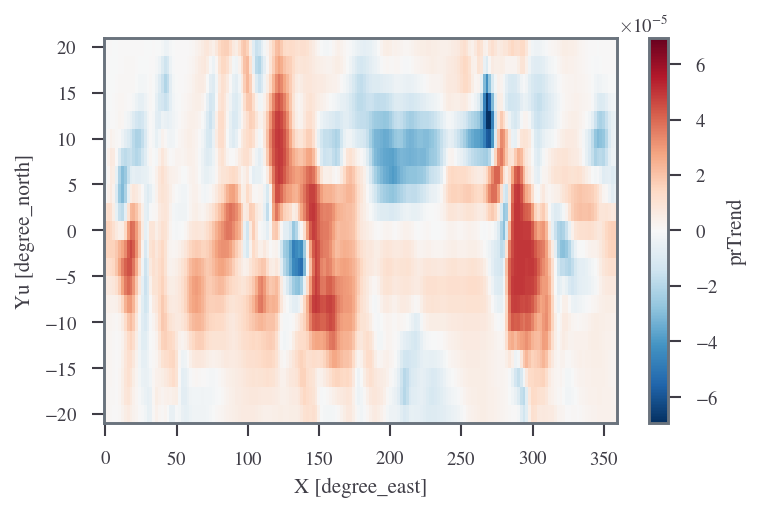

In [40]:
uncoup_atm.prTrend.sel(Yu=slice(-20, 20)).plot()

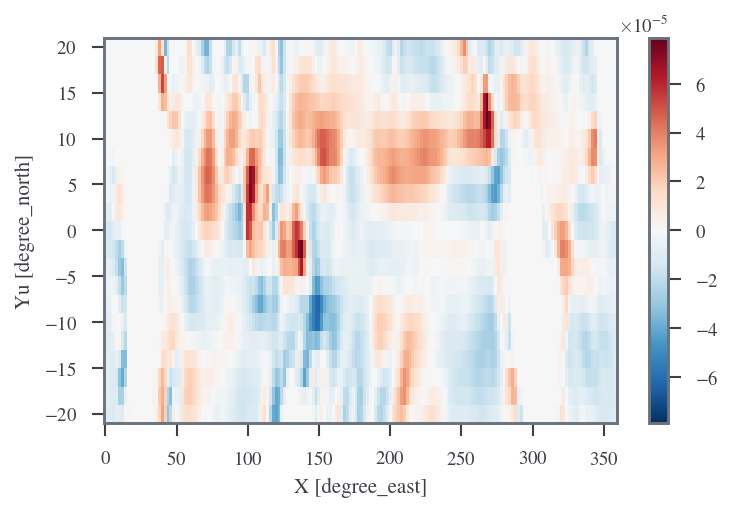

In [44]:
(fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"].sel(Yu=slice(-20, 20))
-uncoup_atm.prTrend.sel(Yu=slice(-20, 20))).plot()

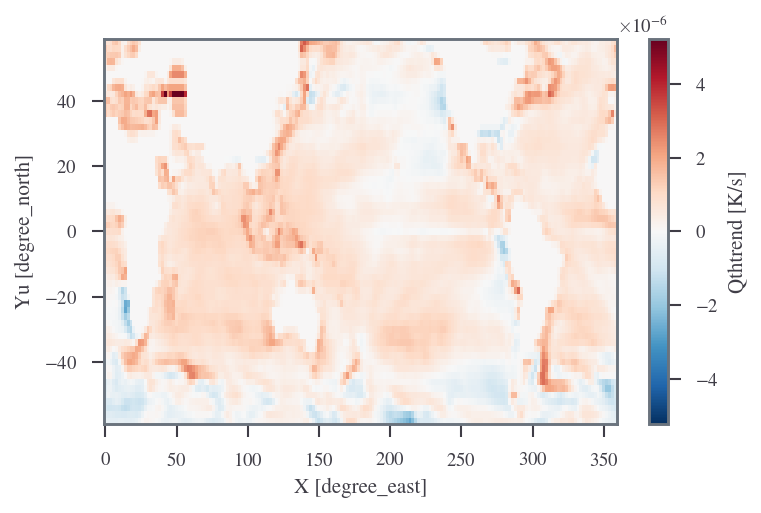

In [46]:
uncoup_atm.Qthtrend.plot()

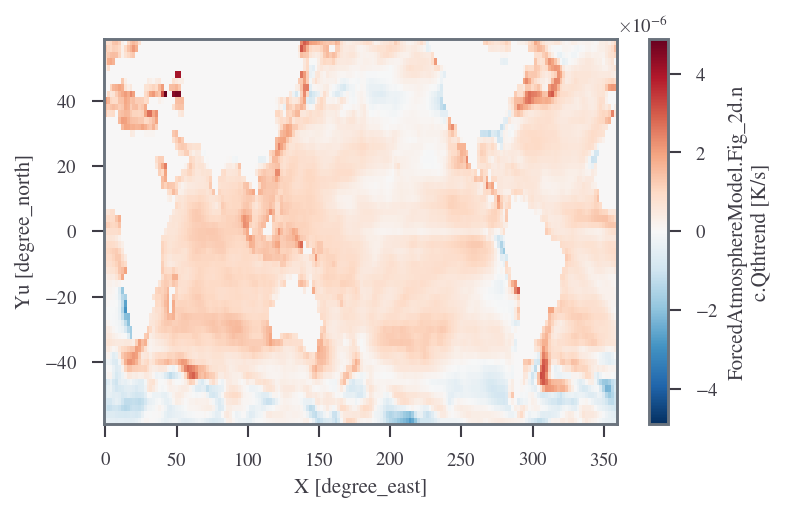

In [71]:
fig_data["ForcedAtmosphereModel.Fig_2d.nc.Qthtrend"].plot()

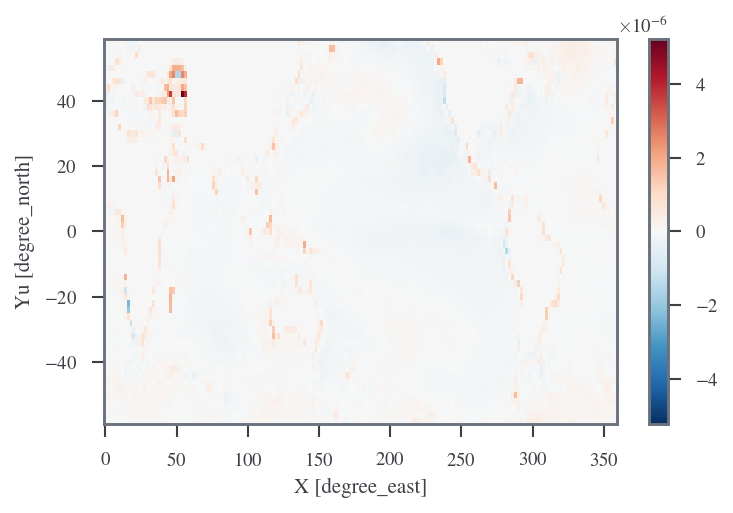

In [72]:
(uncoup_atm.Qthtrend - fig_data["ForcedAtmosphereModel.Fig_2d.nc.Qthtrend"]).plot()

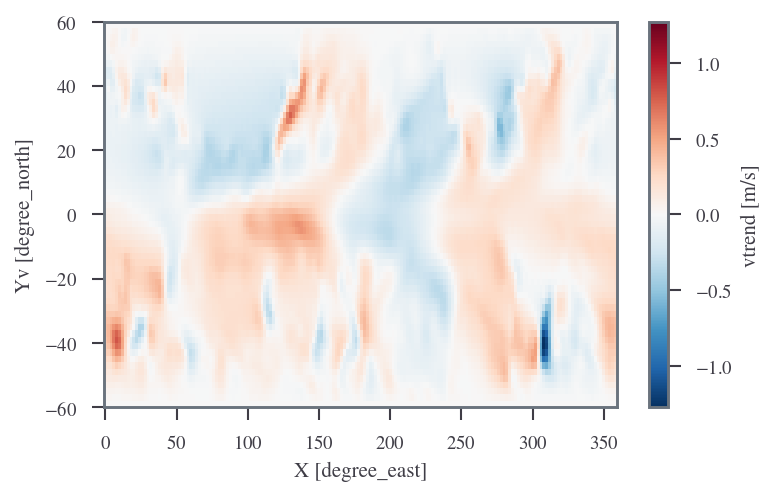

In [51]:
uncoup_atm.vtrend.plot()

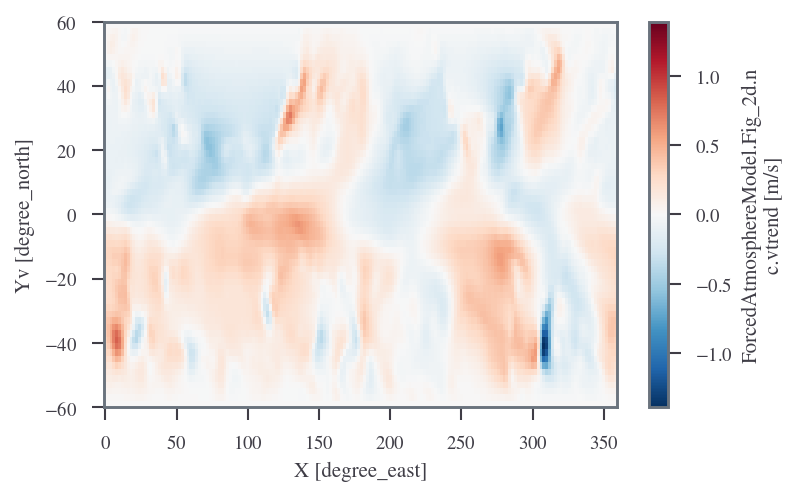

In [73]:
fig_data["ForcedAtmosphereModel.Fig_2d.nc.vtrend"].plot()


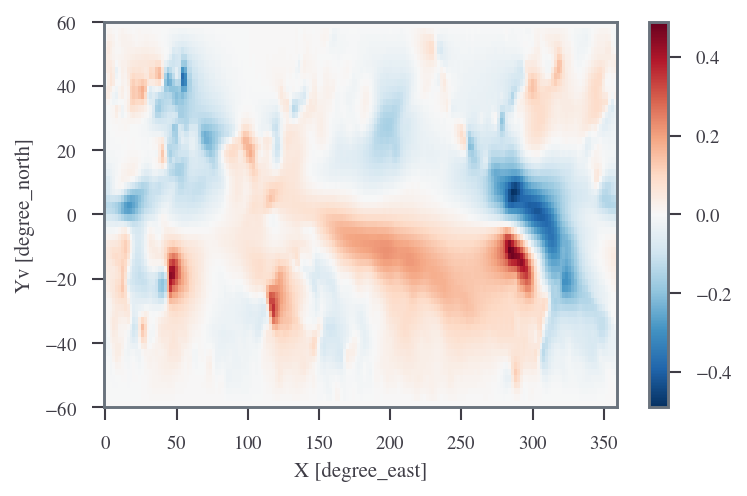

In [74]:
(fig_data["ForcedAtmosphereModel.Fig_2d.nc.vtrend"] - uncoup_atm.vtrend).plot()

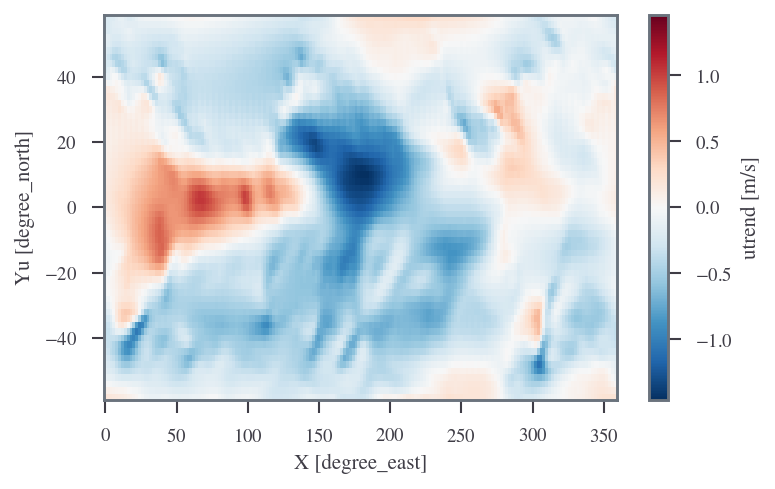

In [57]:
uncoup_atm.utrend.plot()

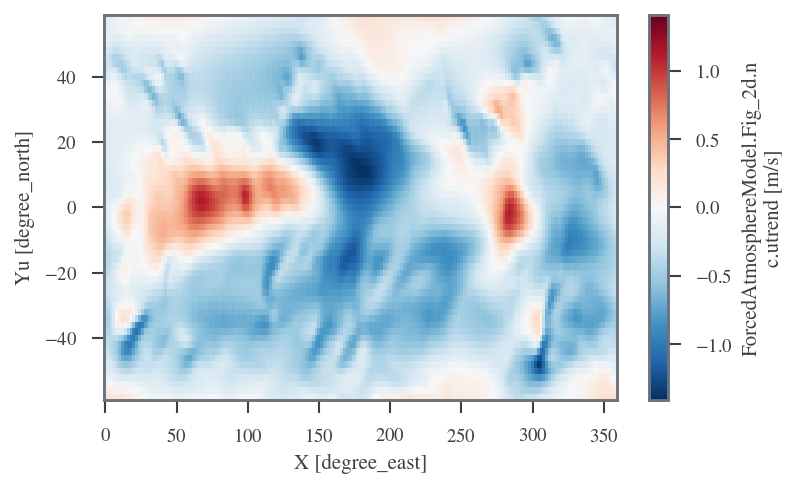

In [75]:
fig_data["ForcedAtmosphereModel.Fig_2d.nc.utrend"].plot()

In [66]:
from src.xr_utils import sel, can_coords

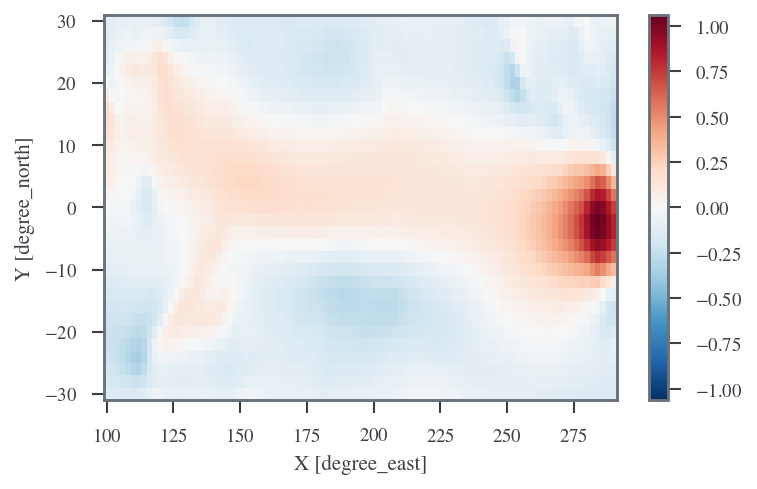

In [76]:
sel(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.utrend"] - uncoup_atm.utrend)).plot()

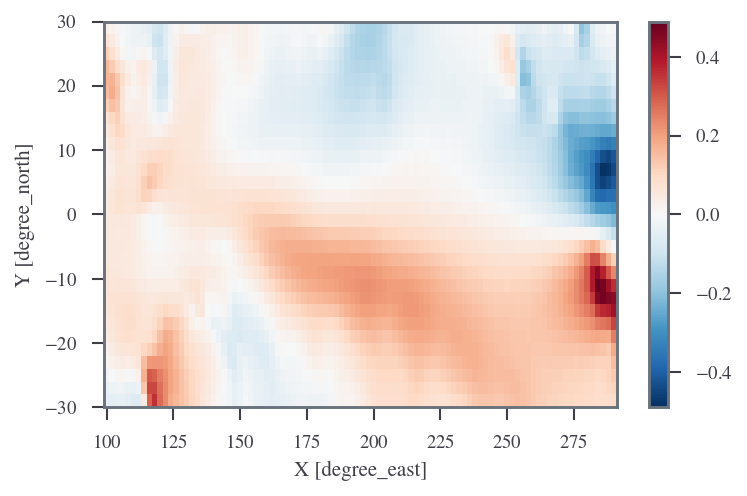

In [77]:
sel(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.vtrend"] - uncoup_atm.vtrend)).plot()

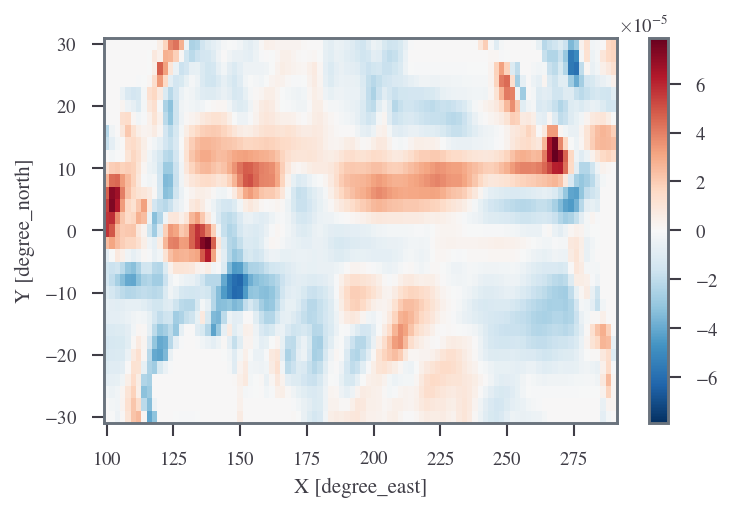

In [78]:
sel(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"] - uncoup_atm.prTrend)).plot()

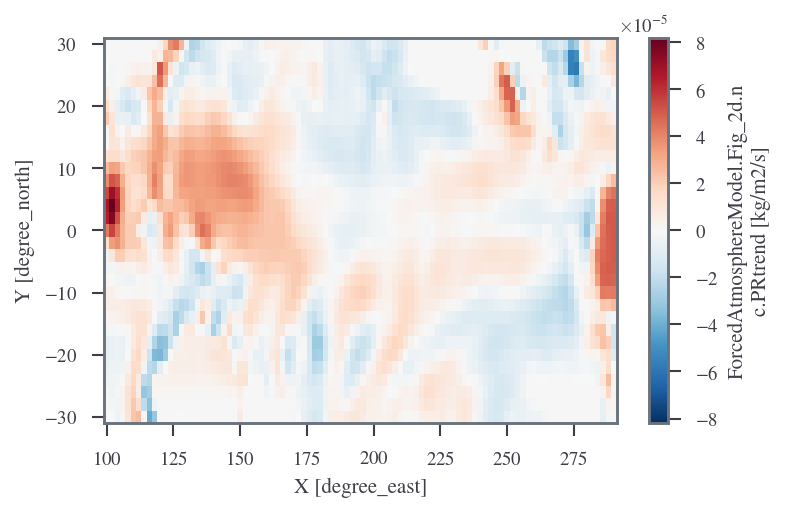

In [81]:
sel(can_coords(fig_data["ForcedAtmosphereModel.Fig_2d.nc.PRtrend"])).plot()

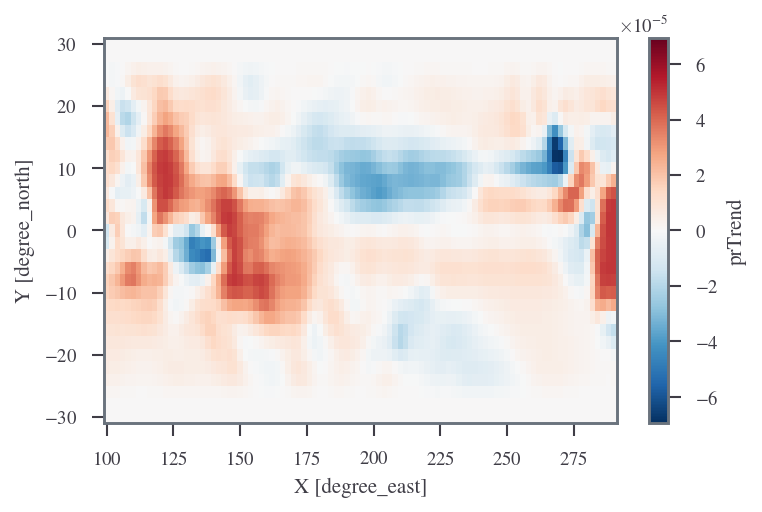

In [82]:
sel(can_coords(uncoup_atm.prTrend)).plot()